<a href="https://colab.research.google.com/github/amin20033/Webel/blob/main/ZomatoDataAnalysis_Webel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Necessary Libraries**

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# **Reading the Dataset**

In [2]:
df = pd.read_csv("/content/sample_data/Zomato data .csv", on_bad_lines='skip', quoting=3)

# **Top 5 Values**

In [3]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


# **Information about Dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


# **Checking Duplicated Values**

In [ ]:
df.duplicated().sum()

0

# **Data Formatting**

In [5]:
df["rate"]=df["rate"].str.strip("/5")

In [6]:
df.rename(columns={"listed_in(type)":"type","approx_cost(for two people)":"cost"},inplace=True)

# **5 Random Rows From Dataset**

In [ ]:
df.sample(5)

,name,online_order,book_table,rate,votes,cost,type
71,The Biryani Cafe,No,No,4.1,520,300,Dining
85,The Big O Bakes,No,No,4.0,66,300,Dining
125,Soms Kitchen & Bakes,No,No,2.9,0,400,Dining
14,San Churro Cafe,Yes,No,3.8,918,800,Cafes
96,Kaggis,No,No,3.8,64,250,Dining


# **Restaurants delivering Online or not**


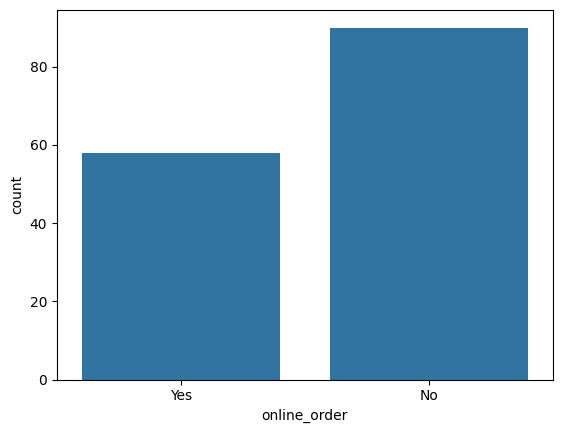

In [ ]:
sns.countplot(x=df["online_order"])
plt.show()

**Conclusion : Offline orders are more than Online Orders in a Restaurant.**

# **Restaurants allowing table booking or not**


book_table
No     140
Yes      8
Name: count, dtype: int64


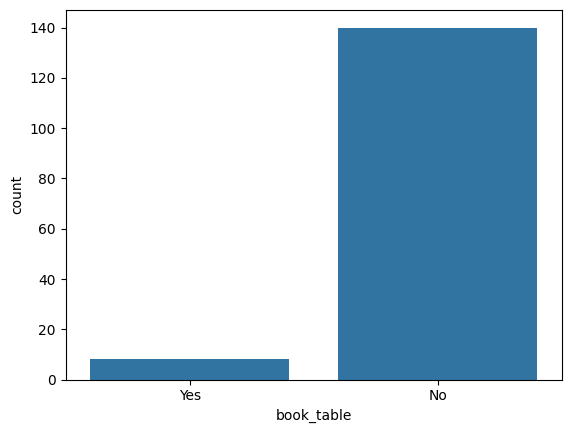

In [ ]:
print(df["book_table"].value_counts())
sns.countplot(x=df["book_table"])
plt.show()

**Conclusion : Less Customers are booking table.**

# **Which mode (booked table or not booked table) has received the maximum rating?**

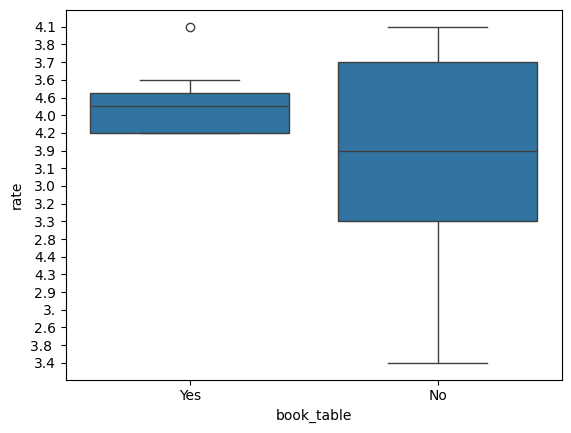

In [7]:
sns.boxplot(x=df["book_table"],y=df["rate"])
plt.show()

**Conclusion : Not Booked tables received more ratings than booked tables.**

# **Type of Restaurant**

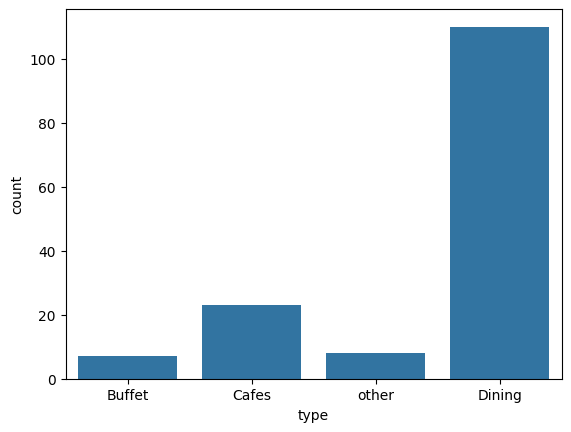

In [ ]:
sns.countplot(x=df["type"])
plt.show()

**Conclusion : More People are inclined towards dining type of Restaurants than Cafes, Buffet and Others.**

# **How many votes has each type of restaurant received from customers?**

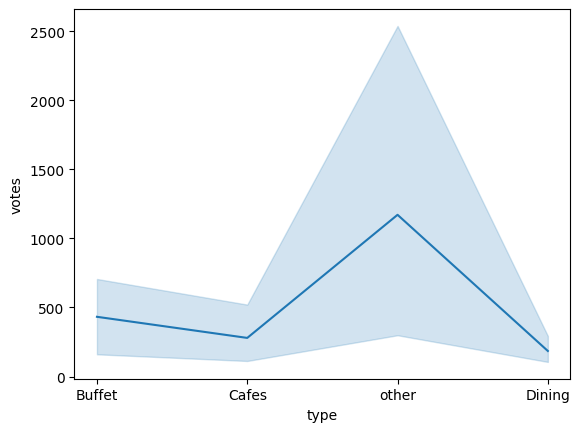

In [13]:
sns.lineplot(x=df["type"],y=df["votes"])
plt.show()

**Conclusion : Other types of Restaurants received more votes.**

# **What are the ratings that the majority of restaurants have received?**

<ipython-input-56-76216d7259a4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df["rate"],kde=False,bins=2)


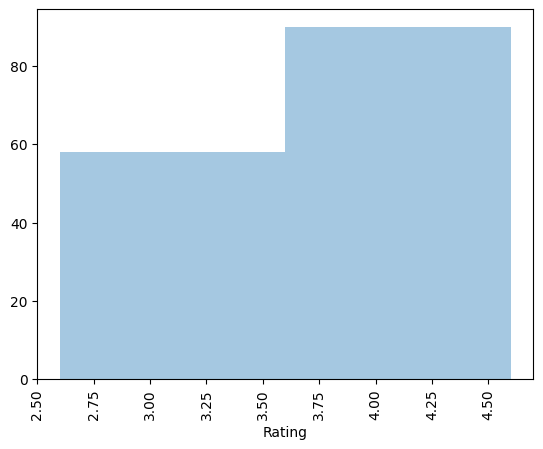

In [ ]:
sns.distplot(x=df["rate"],kde=False,bins=2)
plt.xticks(rotation=90)
plt.xlabel("Rating")
plt.show()

**Conclusion : Most of the Restaurants received rating between 3.7 to 4.5**

# **Zomato has observed that most couples order most of their food online. What are their average spending on each order?**

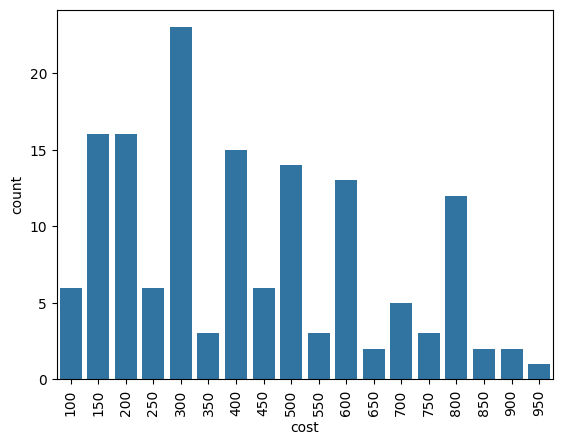

In [ ]:
sns.countplot(x=df["cost"])
plt.xticks(rotation=90)
plt.show()

**Conclusion : Most of the Couples spend ₹300 in an average**

# **Which mode (online or offline) has received the maximum rating?**

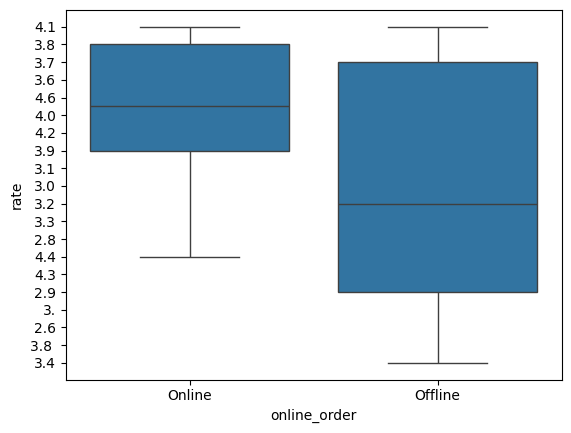

In [8]:
sns.boxplot(x=df["online_order"],y=df["rate"])
plt.xticks(["Yes","No"],["Online","Offline"])
plt.show()

**Conclusion : Online Orders received more rating than Offline Orders**

# **Which type of restaurant received more offline orders?**

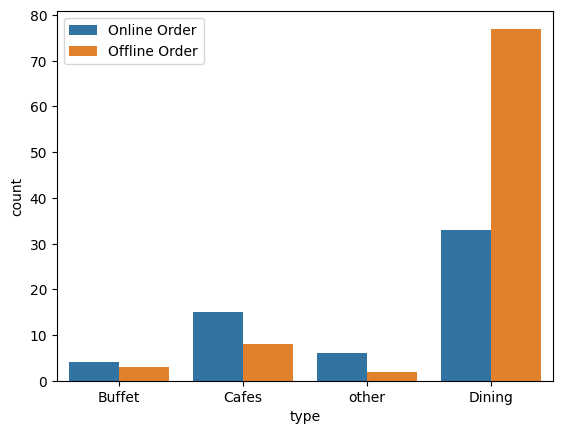

In [11]:
sns.countplot(x=df["type"],hue=df["online_order"])
plt.legend(labels=["Online Order","Offline Order"])
plt.show()

**Conclusion : Dining Received more Offline Orders**

# **5 Bottom Vales**

In [15]:
df.tail()

,name,online_order,book_table,rate,votes,cost,type
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining
147,Vijayalakshmi,Yes,No,3.9,47,200,Dining


# **Label Encoding**

In [16]:
df.replace({"online_order":{"No":0,"Yes":1}},inplace=True)
df.replace({"book_table":{"No":0,"Yes":1}},inplace=True)
df.replace({"type":{"Buffet":1,"Cafes":2,"Dining":3,"other":4}},inplace=True)

<ipython-input-16-655de9fca333>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"online_order":{"No":0,"Yes":1}},inplace=True)
<ipython-input-16-655de9fca333>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"book_table":{"No":0,"Yes":1}},inplace=True)
<ipython-input-16-655de9fca333>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `

# **Separating Dependent and Independent variables**

In [20]:
x=df[['online_order', 'book_table', 'votes',"cost","type"]]
y=df["rate"]

# **Splitting dataset into training and testing sets**

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=42)

# **Model Creation**

In [22]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)


dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

# **Evaluating Models**

In [24]:
print("Linear Regression Metrics:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_lr)}")

print("\nDecision Tree Metrics:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_dt)}")

print("\nRandom Forest Metrics:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf)}")

Linear Regression Metrics:
Mean Squared Error: 0.18519989455991068

Decision Tree Metrics:
Mean Squared Error: 0.17795370370370373

Random Forest Metrics:
Mean Squared Error: 0.17492831438394513


# **New Data For Prediction**

In [31]:
# New input values for prediction
new_data = np.array([[1, 0, 500, 700, 2]])  # Example: online_order=Yes, book_table=No, votes=500, cost=700, type=2

# Predict using Linear Regression
pred_lr = lr.predict(new_data)

# Predict using Decision Tree
pred_dt = dt.predict(new_data)

# Predict using Random Forest
pred_rf = rf.predict(new_data)
print(f"Predicted Rating (Linear Regression): {pred_lr[0]}")
print(f"Predicted Rating (Decision Tree): {pred_dt[0]}")
print(f"Predicted Rating (Random Forest): {pred_rf[0]}")

Predicted Rating (Linear Regression): 3.849456358407916
Predicted Rating (Decision Tree): 4.0
Predicted Rating (Random Forest): 4.022000000000001


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
